In [3]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt

In [4]:
img = cv2.imread('image_06734.jpg',1)
normalized_img = np.zeros(img.shape).astype(float)
normalized_img = cv2.normalize(img.astype(float),normalized_img,0,1,cv2.NORM_MINMAX)

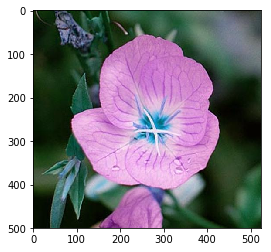

In [5]:
plt.imshow(img)

In [6]:
img.shape

(500, 523, 3)

In [7]:
img_converted = np.zeros_like(img,dtype='float')
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        H = 0
        S = 0
        I = 0
        R = float(normalized_img[i][j][2])
        G = float(normalized_img[i][j][1])
        B = float(normalized_img[i][j][0])
        RGB_sum = R + G + B
        RGB_min = min(R, G, B)
        #print("{} ,{} ,{} , {} , {}".format(R,G,B,RGB_min,RGB_sum))
        I = (1/3) * RGB_sum
        if R == G and G == B:
            H = 0
            S = 0
        else:
            S = 1 - ((3*RGB_min)/RGB_sum)
            if S > 0.9999:
                S = 1
            if S < 0.00001:
                S = 0
                H = 0
            else:
                dividend = (1/2) * ((R-G) + (R-B))
                divisor = math.sqrt(math.pow((R-G),2) + (R-B)*(G-B))
                w = dividend/divisor
                if w > 1:
                    w=1
                elif w < -1:
                    w = -1                    
                H = math.acos(w)
                if B > G:
                    H = (2*math.pi) - H
        img_converted[i][j][0] = H * (180 / math.pi)
        img_converted[i][j][1] = S
        img_converted[i][j][2] = I


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


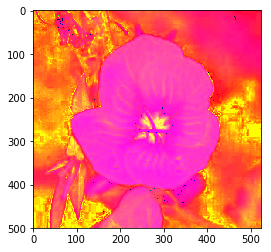

In [8]:
plt.imshow(img_converted)

In [9]:
print("RGB {},{},{}  , HSI {},{},{}".format(img[0][0][2],img[0][0][1],img[0][0][0],img_converted[0][0][0]
                                           ,img_converted[0][0][1],img_converted[0][0][2]))

RGB 0,53,22  , HSI 144.40058143648292,1.0,0.0980392156862745


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


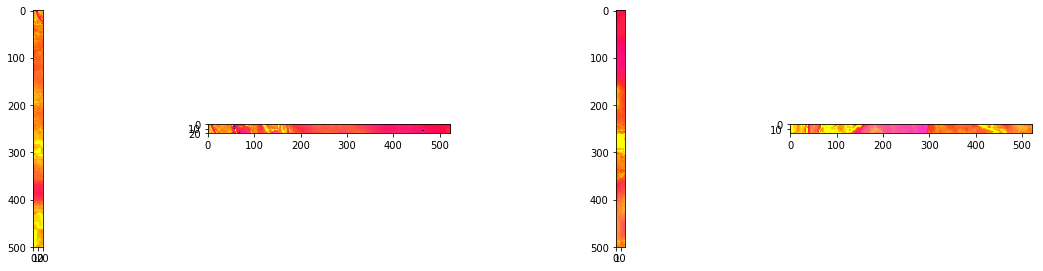

In [10]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(4,4,1)
plt.imshow(img_converted[0:,0:20])
ax = fig.add_subplot(4,4,2)
plt.imshow(img_converted[0:20,0:])
ax = fig.add_subplot(4,4,3)
plt.imshow(img_converted[0:,-20:-1])
ax = fig.add_subplot(4,4,4)
plt.imshow(img_converted[-20:-1,0:])

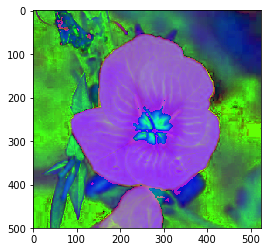

In [11]:
HSV_img = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
plt.imshow(HSV_img)

(array([  488.,   343.,   550.,   546.,  1711.,  1844.,  1618.,  1539.,
         2171.,  1672.,  1839.,  2652.,  2060.,  3063.,  2993.,  2781.,
         3229.,  2786.,  2464.,  2955.,  2904.,  3818.,  3158.,  3015.,
         2921.,  2856.,  4236.,  2618.,  2727.,  2709.,  3069.,  2469.,
         2834.,  2835.,  3353.,  4111.,  4257.,  3938.,  4424.,  4541.,
         4712.,  4363.,  4750.,  4683.,  5121.,  5614.,  6806.,  5846.,
         6386.,  5807.,  6325.,  6091.,  4677.,  4839.,  3945.,  5223.,
         4815.,  4376.,  4361.,  5219.,  5171.,  5882.,  5817.,  6953.,
         9315.,  8450.,  9856.,  9071.,  8138., 12529.,  5650.,  7360.,
         5799.,  5856.,  6589.,  4448.,  3692.,  4370.,  3377.,  4225.,
         5706.,  3252.,  3164.,  4163.,  3748.,  3444.,  2922.,  3578.,
         3154.,  3174.,  3637.,  3112.,  3412.,  3430.,  3489.,  3589.,
         4229.,  3467.,  4394.,  3469.,  3696.,  3668.,  2929.,  3389.,
         3083.,  2725.,  2703.,  2523.,  2535.,  2632.,  2430., 

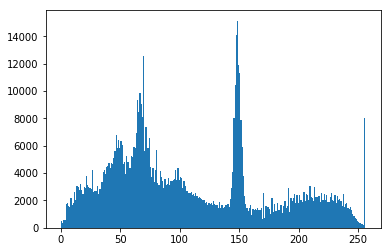

In [12]:
mask = np.zeros(HSV_img.shape[:2],np.uint8)
mask[0:,0:20] = 1
#cv2.calcHist(images, channels, mask, bins, ranges)
hist1 = cv2.calcHist([HSV_img],[0],mask,[256],[0,256])
plt.hist(HSV_img.ravel(),256,[0,256])

In [ ]:
for i in range(hist1.shape[0]):
    hist1[i][0]

In [18]:
hist1[69]

array([1519.], dtype=float32)

In [16]:
hist1.argmax()

69